In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Importación de Bases de Datos entregadas:

In [23]:
spotify_dataset = pd.read_csv("Data/spotify_dataset.csv")
labeled_songs = pd.read_csv("Data/labeled_songs.csv")
user_preferences = pd.read_csv("Data/user_preferences.csv")

/var/folders/3w/y30mt9610mg800d5f3w0f6b40000gn/T/ipykernel_5312/1987078614.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_dataset = pd.read_csv("Data/spotify_dataset.csv")


In [24]:
labeled_songs.describe()

,Unnamed: 0.1,song_index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,70.000000
mean,21782.646667,21782.646667,0.642853,0.759599,5.746667,-6.396040,0.493333,0.136860,0.117562,0.278012,0.204257,0.356676,145.917067,253975.913333,3.966667,10387.257143
std,11106.029643,11106.029643,0.159452,0.200238,3.610549,3.689538,0.501630,0.135879,0.209459,0.379094,0.158467,0.223722,23.318364,105495.225493,0.336118,6172.611304
min,464.000000,464.000000,0.176000,0.014800,0.000000,-32.929000,0.000000,0.027500,0.000004,0.000000,0.040000,0.030700,88.031000,77584.000000,1.000000,153.000000
25%,13518.500000,13518.500000,0.537000,0.638000,2.000000,-8.363250,0.000000,0.048600,0.002670,0.000000,0.103000,0.153250,128.006500,180571.250000,4.000000,5078.750000
50%,19727.000000,19727.000000,0.659500,0.820500,6.000000,-5.883500,0.000000,0.071400,0.021550,0.001930,0.136000,0.347500,143.008500,223771.500000,4.000000,10228.000000
75%,30621.250000,30621.250000,0.766750,0.923250,9.000000,-4.283000,1.000000,0.193250,0.116000,0.743750,0.274250,0.531750,156.518250,303119.750000,4.000000,15996.000000
max,42298.000000,42298.000000,0.950000,0.997000,11.000000,0.672000,1.000000,0.877000,0.955000,0.968000,0.924000,0.884000,200.068000,597055.000000,5.000000,20993.000000


In [25]:
labeled_songs.head()

,Unnamed: 0.1,song_index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,1445,1445,0.755,0.561,0,-9.178,1,0.0467,0.00188,0.009390,...,7rjkEHShjeeBFxN30g6OWm,spotify:track:7rjkEHShjeeBFxN30g6OWm,https://api.spotify.com/v1/tracks/7rjkEHShjeeB...,https://api.spotify.com/v1/audio-analysis/7rjk...,168046,4,Dark Trap,500 on Me,NaN,NaN
1,2540,2540,0.516,0.649,6,-4.307,0,0.1940,0.59100,0.000018,...,75bfH2B3aSMK6Z2ISCKG6B,spotify:track:75bfH2B3aSMK6Z2ISCKG6B,https://api.spotify.com/v1/tracks/75bfH2B3aSMK...,https://api.spotify.com/v1/audio-analysis/75bf...,204800,3,Dark Trap,Taurine,NaN,NaN
2,3219,3219,0.633,0.931,4,-5.172,0,0.0342,0.04650,0.947000,...,6hlGRsmAUTXeK30lmvj3a5,spotify:track:6hlGRsmAUTXeK30lmvj3a5,https://api.spotify.com/v1/tracks/6hlGRsmAUTXe...,https://api.spotify.com/v1/audio-analysis/6hlG...,272000,4,Dark Trap,Elayshun,NaN,NaN
3,464,464,0.785,0.442,8,-13.061,0,0.4440,0.11100,0.000067,...,62vRjmpzgvqIDYlFJlgTtS,spotify:track:62vRjmpzgvqIDYlFJlgTtS,https://api.spotify.com/v1/tracks/62vRjmpzgvqI...,https://api.spotify.com/v1/audio-analysis/62vR...,151385,4,Dark Trap,Manny,NaN,NaN
4,1451,1451,0.857,0.731,1,-6.354,1,0.0754,0.08220,0.000364,...,0TKg8mG9qQX31U5qWoECjr,spotify:track:0TKg8mG9qQX31U5qWoECjr,https://api.spotify.com/v1/tracks/0TKg8mG9qQX3...,https://api.spotify.com/v1/audio-analysis/0TKg...,152880,4,Dark Trap,Naloxone,NaN,NaN


In [26]:
spotify_dataset.describe()

,Unnamed: 0.1,song_index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,21152.000000,21152.000000,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,12212.545906,12212.545906,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.000000,0.000000,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,10576.000000,10576.000000,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,21152.000000,21152.000000,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,31728.000000,31728.000000,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,42304.000000,42304.000000,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [27]:
spotify_dataset.head()

,Unnamed: 0.1,song_index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,Unnamed: 0,title
0,0,0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,...,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Mercury: Retrograde,NaN,NaN
1,1,1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,...,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Pathology,NaN,NaN
2,2,2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,...,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Symbiote,NaN,NaN
3,3,3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,...,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,4,4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,...,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Venom,NaN,NaN


In [28]:
user_preferences.head()

,0,10640
0,0,12083
1,0,4440
2,0,3841
3,1,27795
4,1,30052


In [29]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'tempo']
spotify_data = spotify_dataset[features]
spotify_data.head()

,danceability,energy,valence,acousticness,instrumentalness,liveness,tempo
0,0.831,0.814,0.3890,0.0598,0.013400,0.0556,156.985
1,0.719,0.493,0.1240,0.4010,0.000000,0.1180,115.080
2,0.850,0.893,0.0391,0.0138,0.000004,0.3720,218.050
3,0.476,0.781,0.1750,0.0237,0.000000,0.1140,186.948
4,0.798,0.624,0.5910,0.2170,0.000000,0.1660,147.988


In [30]:
spotify_data.isnull().sum()

danceability        0
energy              0
valence             0
acousticness        0
instrumentalness    0
liveness            0
tempo               0
dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
spotify_data_escalar = escalar.fit_transform(spotify_data)

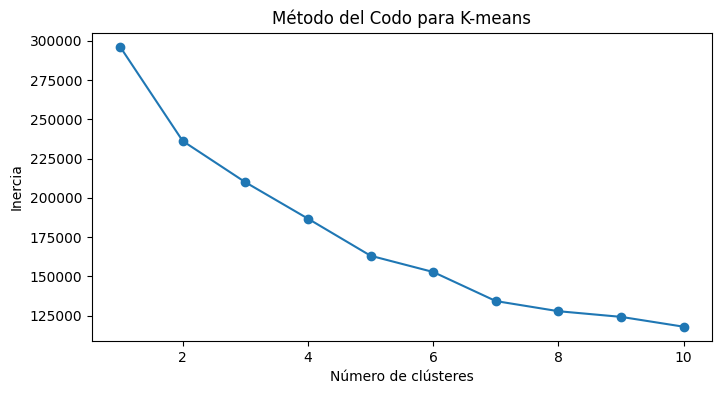

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spotify_data_escalar)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.show()

In [36]:
# Suponiendo que el número óptimo de clústeres es 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(spotify_data_escalar)

# Agregar las etiquetas de clústeres al DataFrame original
spotify_dataset['kmeans_cluster'] = kmeans_labels

# Ver las primeras filas con las etiquetas de clústeres
spotify_dataset[['song_name', 'kmeans_cluster']].head()

,song_name,kmeans_cluster
0,Mercury: Retrograde,2
1,Pathology,0
2,Symbiote,2
3,ProductOfDrugs (Prod. The Virus and Antidote),1
4,Venom,2


In [39]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN con parámetros ajustados
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(spotify_data_escalar)

# Agregar las etiquetas de DBSCAN al DataFrame original
spotify_dataset['dbscan_cluster'] = dbscan_labels

# Ver las primeras filas con las etiquetas de DBSCAN
spotify_dataset[['song_name', 'dbscan_cluster']].head()

,song_name,dbscan_cluster
0,Mercury: Retrograde,0
1,Pathology,-1
2,Symbiote,-1
3,ProductOfDrugs (Prod. The Virus and Antidote),0
4,Venom,0


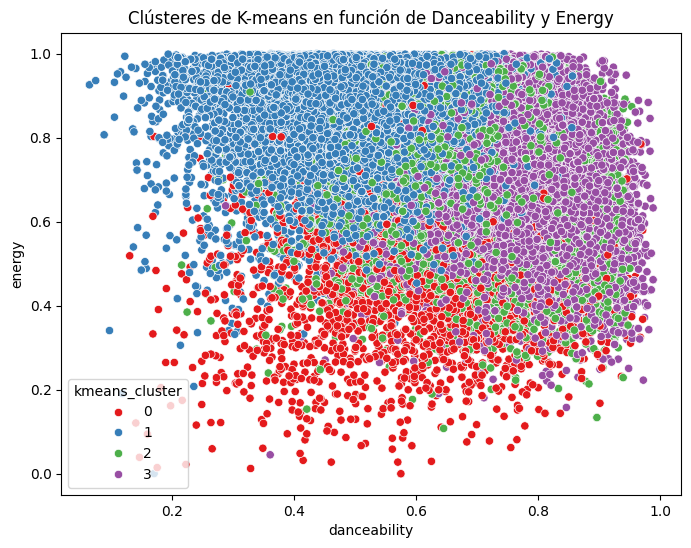

In [40]:
import seaborn as sns

# Graficar los clústeres de K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_data['danceability'], y=spotify_data['energy'],
                hue=spotify_data['kmeans_cluster'], palette='Set1')
plt.title('Clústeres de K-means en función de Danceability y Energy')
plt.show()